In [1]:
def is_lab_notebook():
    import re
    import psutil

    return any(re.search('jupyter-notebook', x)
               for x in psutil.Process().parent().cmdline())


In [2]:
is_lab_notebook()

False

In [3]:
import psutil
print(psutil.Process().parent().cmdline())

['/Users/kenworthy/anaconda3/bin/python', '/Users/kenworthy/anaconda3/bin/jupyter-lab']


In [4]:
get_ipython().__class__.__name__

'ZMQInteractiveShell'

In [5]:
from hcipy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import paths

mpl.rcParams['figure.dpi'] = 100

In [6]:
pupil_grid = make_pupil_grid(256, 1.5)
focal_grid = make_focal_grid(8, 12)
prop = FraunhoferPropagator(pupil_grid, focal_grid)


ratio = 0.5
aperture = evaluate_supersampled(make_obstructed_circular_aperture(1,central_obscuration_ratio=ratio),
                                 pupil_grid, 4)

wf = Wavefront(aperture)
img_ref = prop(wf).intensity

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
/var/folders/zm/qtzjdv5n0cn8nfqj4swc5xx00000gn/T/ipykernel_41984/1962580629.py:17: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_xlabel(f"X [$\lambda/D$]")


Text(0.5, 0, 'X [$\\lambda/D$]')

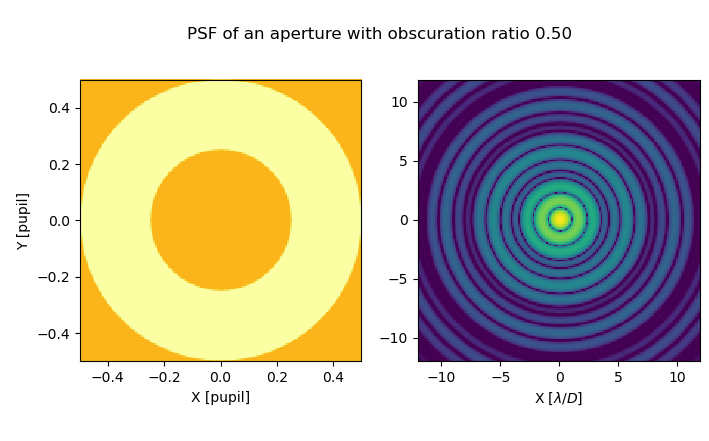

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

imim = imshow_field(aperture, 
             ax=ax1,
             vmin=-5, 
             cmap='inferno')

imim2 = imshow_field(np.log10(img_ref / img_ref.max()), 
             ax=ax2,
             vmin=-5, 
             cmap='viridis')
fig.suptitle(f"PSF of an aperture with obscuration ratio {ratio:0.2f}")
ax1.set_xlim(-0.5,0.5)
ax1.set_ylim(-0.5,0.5)
ax1.set_xlabel("X [pupil]")
ax1.set_ylabel("Y [pupil]")
ax2.set_xlabel(f"X [$\lambda/D$]")



In [10]:
imim

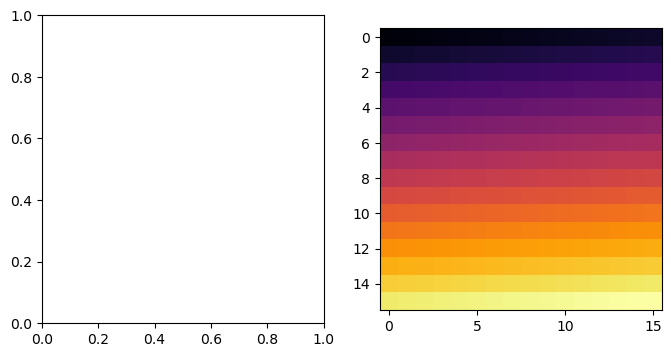

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

imim = plt.imshow(np.arange(256).reshape((16,16)), 
             vmin=-5, 
             cmap='inferno')


In [23]:
imim.set_array(np.zeros((16,16)))
plt.draw()
plt.show()

<Figure size 640x480 with 0 Axes>

In [24]:
imim.get_array()

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.,

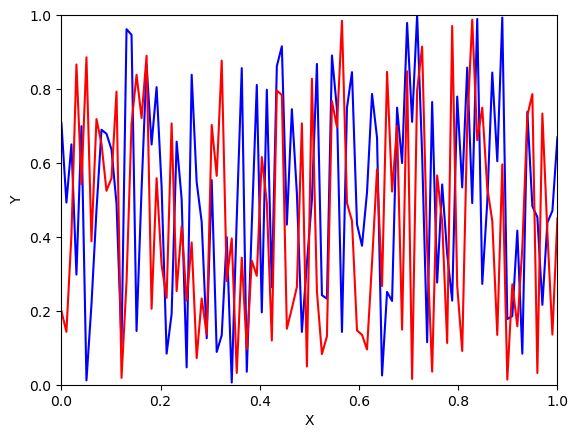

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython import display

def pltsin(ax, *,hdisplay, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    hdisplay.update(fig)


fig,ax = plt.subplots(1,1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    time.sleep(1)
    
plt.close(fig)

